In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
mpl.style.use('default')
plt.rc('text',usetex = True)
plt.rc('font', family='serif',size = 12)

In [ ]:
# # Data from the publications according to 
data = {
    'Year': [2019, 2020, 2021, 2022, 2023, 2024, 2025],
    'Final Graduation Projects': [0, 1, 0, 1, 1, 0, 1],
    "Master's Degree Dissertations": [0, 2, 3, 1, 0, 1, 3],
    'Doctoral Theses': [1, 0, 0, 0, 3, 2, 1],
    'Journal Articles': [0, 2, 8, 10, 8, 11, 3],
    'Conference Papers': [1, 7, 10, 3, 4, 3, 0],
    'Books': [0, 0, 0, 0, 0, 0, 1],
    'Other Articles': [0, 0, 0, 1, 0, 0, 0],
    'Repository Articles': [0, 1, 2, 0, 3, 0, 0],
    'Specialization Monographs': [0, 0, 0, 1, 0, 0, 0],
}

In [11]:
# Convert to DataFrame
pub = pd.DataFrame(data)
pub.set_index('Year', inplace=True)

In [13]:
# Reordering the columns according to https://github.com/petrobras/3W/blob/main/LISTS_OF_CITATIONS.md
ordered_columns = [
    'Books',
    'Conference Papers',
    'Doctoral Theses',
    'Final Graduation Projects',
    'Journal Articles',
    "Master's Degree Dissertations",
    'Other Articles',
    'Repository Articles',
    'Specialization Monographs'
]

df = pub[ordered_columns]

In [14]:
# Calculate the cumulative sum
df_cumulative = df.cumsum()

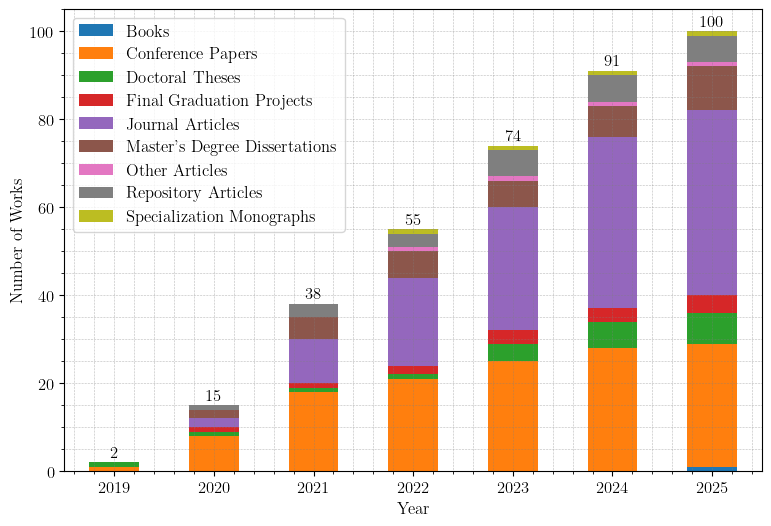

In [16]:
# Plotting the data
ax = df_cumulative.plot(kind='bar', stacked=True, figsize=(9, 6))

# Axis
plt.ylabel('Number of Works')
plt.xlabel('Year')
plt.xticks(rotation=0)

# Legend
ax.legend(title=None)

# Grid - I like this formar
plt.grid(True, linestyle=':', linewidth=0.4, which='major', color='gray')
plt.minorticks_on()
plt.grid(True, linestyle=':', linewidth=0.4, which='minor', color='gray')

# Plot the cumulative sum on top of the bars
totals = df_cumulative.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(i, total + 0.5, str(int(total)), ha='center', va='bottom', fontsize=12, weight='bold', color='black')

# Saving
plt.savefig('citation_progress.svg', format='svg', bbox_inches='tight')

plt.show()